In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

Importing the libraries that we will use

In [0]:
X,y=make_blobs(n_samples=100, n_features=3, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

colors=["b","g","r","c","k"]

Creating a blob of 100 samples and 3 features

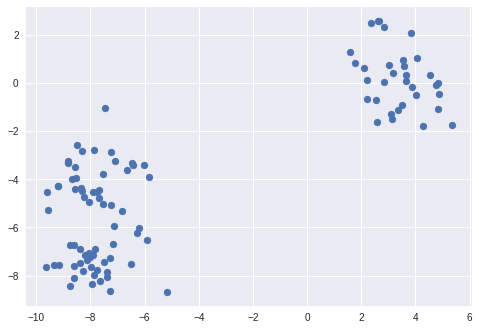

In [0]:
plt.scatter(X[:,0],X[:,1])
plt.show()

Plotting the samples and as we can see there are 3 clusters

In [0]:
class K_Means:
  def __init__(self,k,tol=0.0001,max_iter=300): #tol->how much the centroid is gonna move; max_iter->max iterations that will run 300 should be enough
    self.k=k
    self.tol=tol
    self.max_iter=max_iter
    
  def fit(self,data):
    self.centroids={}
    
    for i in range(self.k):
      self.centroids[i]=data[i] #centroids will be the first 2 data points initially
      
    for i in range(self.max_iter):
      self.classifications={}
      
      for i in range(self.k):
        self.classifications[i]=[]
        
      for featureset in X:
        distances=[np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification=distances.index(min(distances))
        self.classifications[classification].append(featureset)
        
      prev_centroids=dict(self.centroids) #dict so that it wont keep changing everytime self.centroids changes //OOP
      
      for classification in self.classifications:
        self.centroids[classification]=np.average(self.classifications[classification],axis=0) #average of all classifications and redefining the centroid
        
      optimized=True
      for c in self.centroids:
        original_centroid=prev_centroids[c]
        current_centroid = self.centroids[c]
        if np.sum((current_centroid-original_centroid)/original_centroid*100.0)>self.tol:
          optimized=False
      
      if optimized:
        break
      
  
  def predict(self,data):
    distances=[np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
    classification=distances.index(min(distances))
    return classification
  
    

In [0]:
k=3
clf = K_Means(k)
clf.fit(X)

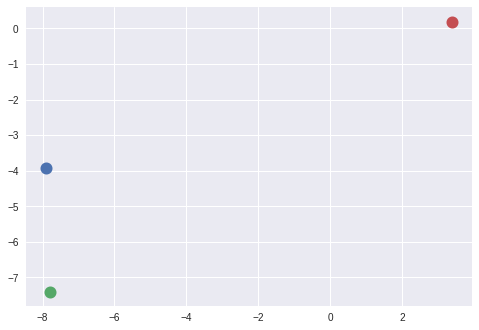

In [0]:
for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1], marker="o",linewidths=5)
  
plt.show()

gets the centers and plots them

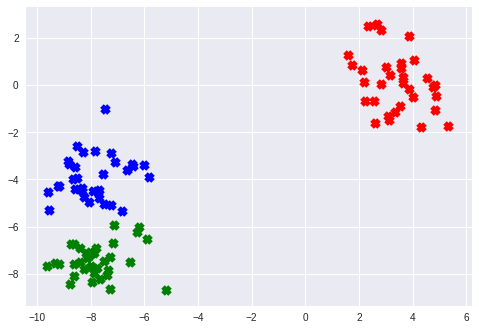

In [0]:
#for centroid in clf.centroids:
  #plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1], marker="o",linewidths=5)

for classification in clf.classifications:
  color=colors[classification]
  #print(colors[classification])
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0],featureset[1],marker='x',color=color,linewidth=5)

plt.show()